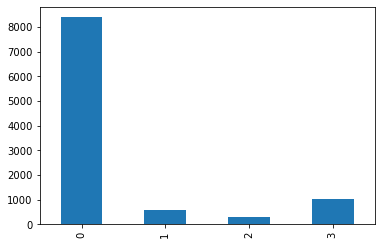

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
with open("../pickle/results_latefee.pickle", "rb") as fp:
    res_lf = pickle.load(fp)
    res_lf=res_lf["test"]
with open("../pickle/results_purchase.pickle", "rb") as fp:
    res_pur = pickle.load(fp)
    res_pur=res_pur["test"]
with open("../pickle/df_cleaned.pickle", "rb") as fp:
    df = pickle.load(fp)
    
    
res_lf['consecutive']=0
compromised=np.unique(df['Key'])
for i in [6,5,4]:
    mask=(df.YEAR==2018)&(df.MONTH.isin([i]))&(df['TRANSACTION CODE']==605.0)
    compromised=np.intersect1d(np.unique(df[mask]['Key']),compromised)
    res_lf.loc[res_lf.Key.isin(compromised),'consecutive']+=1
    
res_lf.consecutive.value_counts().sort_index().plot.bar()

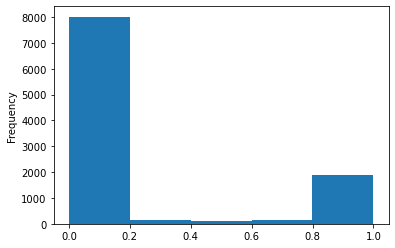

In [2]:
res_lf['four_cons']=1-(1+res_lf.scores**4)**(-12)
res_lf.four_cons.plot.hist(bins=5)


In [3]:
est_loss=res_lf.scores*np.exp(res_pur.scores)
est_loss[est_loss>1000]=1000
est_loss=(est_loss-np.min(est_loss))/(np.max(est_loss)-np.min(est_loss))
grp=pd.DataFrame({'Key': res_pur.Key,
                  'consecutive':res_lf.consecutive,
                  'pur_grp':pd.qcut(res_pur.scores,2,labels=False),
                  'lf_grp':np.round(res_lf.scores*5),
                  'final':np.round(est_loss*4)})


0.0    6237
1.0    2286
2.0     401
3.0     206
4.0    1185
Name: final, dtype: int64


(array([ 0., 10., 20., 30., 40., 50., 60., 70.]),
 <a list of 8 Text major ticklabel objects>)

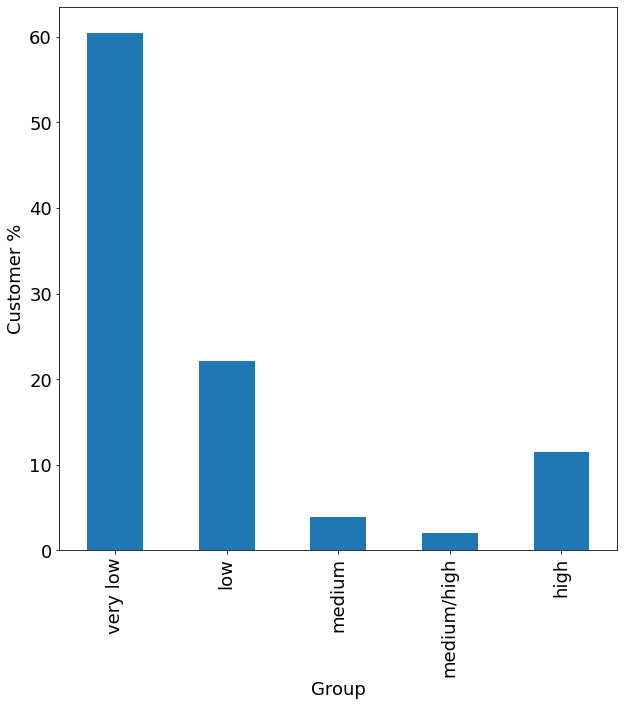

In [4]:
grp.loc[grp.consecutive>2,'final']=4
plot_source=grp.final.value_counts().sort_index()
print(plot_source)
plot_source=100*plot_source/np.sum(plot_source)
plot_source.index = ["very low","low","medium","medium/high","high"]
plt.figure(figsize=[10, 10])
ax = plot_source.plot.bar()
ax.set_xlabel("Group",fontsize=18)
ax.set_ylabel("Customer %",fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)